In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv("churn.csv")
data = data.drop(data.columns[0:2], axis = 1)

In [5]:
data.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,1144,42,1.01
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,1291,33,1.45
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,1887,20,0.00
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,1171,20,1.16
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,816,28,0.00


In [6]:
data.isna().sum()

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Trans_Amt             0
Total_Trans_Ct              0
Avg_Utilization_Ratio       0
dtype: int64

([<matplotlib.patches.Wedge at 0x7fe720c96fa0>,
 [Text(0.962837119553905, 0.5319254470404094, 'Attrited Customer'),
  Text(-0.9628370946526768, -0.5319254921140673, 'Existing Customer')],
 [Text(0.525183883393039, 0.29014115293113235, '16%'),
  Text(-0.5251838698105509, -0.2901411775167639, '84%')])

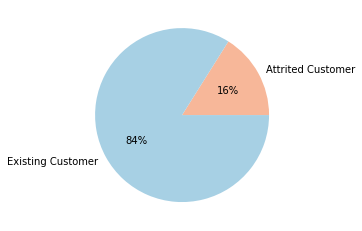

In [7]:
df_pie = data.groupby("Attrition_Flag").size().to_frame(' ')
plt.pie([1627, 8500], labels = ['Attrited Customer', 'Existing Customer'], colors = sns.color_palette('RdBu', 2), autopct='%.0f%%')

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


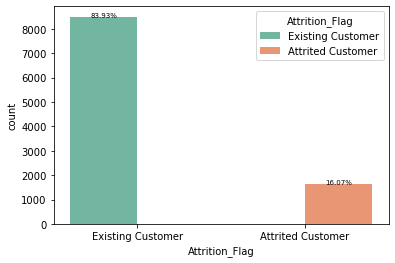

In [8]:
df_plt = data[data['Attrition_Flag'].isin(['Attrited Customer', 'Existing Customer']) ]
ax = sns.countplot(data = df_plt, x = "Attrition_Flag", hue="Attrition_Flag", palette="Set2")
n_records = float(len(data))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 1, '{:1.2%}'.format(height/n_records), ha="center", fontsize =7)
 

<AxesSubplot:xlabel='Total_Relationship_Count', ylabel='count'>

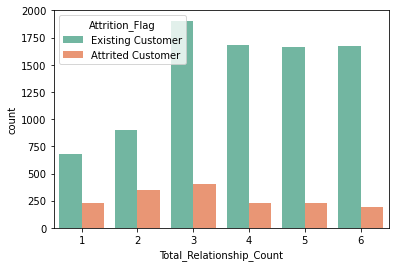

In [9]:
data["Total_Relationship_Count"].value_counts()
df_plt3 = data[data['Total_Relationship_Count'].isin([1,2,3,4,5,6])]
sns.countplot(data = df_plt3, x = "Total_Relationship_Count", hue="Attrition_Flag", palette="Set2")  

<AxesSubplot:xlabel='Contacts_Count_12_mon', ylabel='count'>

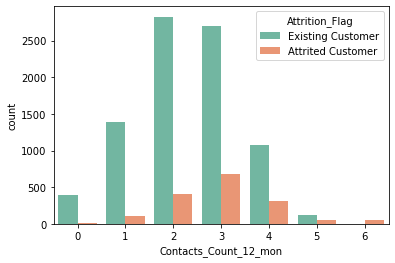

In [10]:
data["Contacts_Count_12_mon"].value_counts()
df_plt4 = data[data['Contacts_Count_12_mon'].isin([0,1,2,3,4,5,6])]
sns.countplot(data = df_plt4, x = "Contacts_Count_12_mon", hue="Attrition_Flag", palette="Set2")  

<AxesSubplot:xlabel='Card_Category', ylabel='count'>

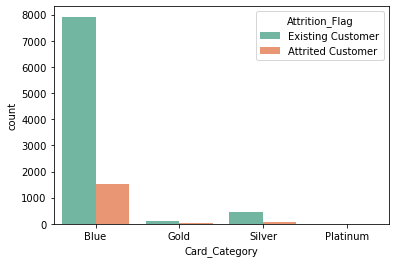

In [11]:
data["Card_Category"].value_counts()
df_plt5 = data[data['Card_Category'].isin(["Blue", "Silver", "Gold", "Platinum"])]
sns.countplot(data = df_plt4, x = "Card_Category", hue="Attrition_Flag", palette="Set2")  


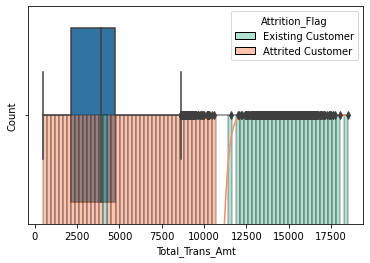

In [12]:
sns.histplot(data = data, x = "Total_Trans_Amt", hue = 'Attrition_Flag', multiple="stack", palette="Set2", kde=True) 
ax = sns.boxplot(x = data['Total_Trans_Amt'])

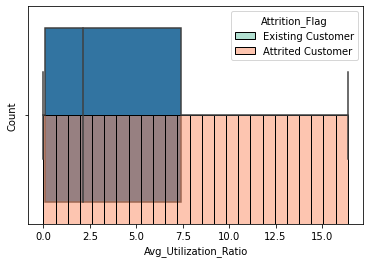

In [13]:
sns.histplot(data = data, x = "Avg_Utilization_Ratio", hue = 'Attrition_Flag', multiple="stack", palette="Set2", kde=True) 
ax2 = sns.boxplot(x = data['Avg_Utilization_Ratio'])

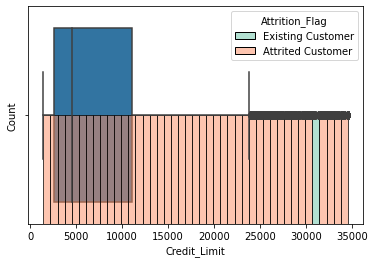

In [14]:
sns.histplot(data = data, x = "Credit_Limit", hue = 'Attrition_Flag', multiple="stack", palette="Set2", kde=True) 
ax4 = sns.boxplot(x = data['Credit_Limit'])


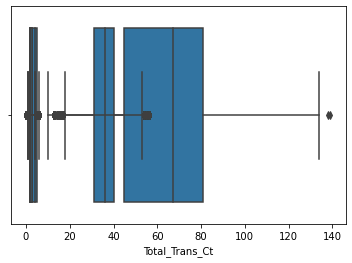

In [15]:
ax5 = sns.boxplot(x = data['Months_on_book'])
ax6 = sns.boxplot(x = data['Total_Relationship_Count'])
ax7 = sns.boxplot(x = data['Months_Inactive_12_mon'])
ax8 = sns.boxplot(x = data['Contacts_Count_12_mon'])
ax9 = sns.boxplot(x = data['Total_Trans_Ct'])

In [17]:
data = pd.get_dummies(data, columns = ['Education_Level', 'Gender', 'Marital_Status', 'Income_Category', 'Card_Category'])

replace = {'Existing Customer' : 0, 'Attrited Customer' : 1}
data = data.replace(replace)

In [18]:
cols = data.columns # one or more

Q1 = data[cols].quantile(0.10)
Q3 = data[cols].quantile(0.90)
IQR = Q3 - Q1

data = data[~((data[cols] < (Q1 - 1.5 * IQR)) |(data[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

## Mean analysis

<AxesSubplot:ylabel='variables'>

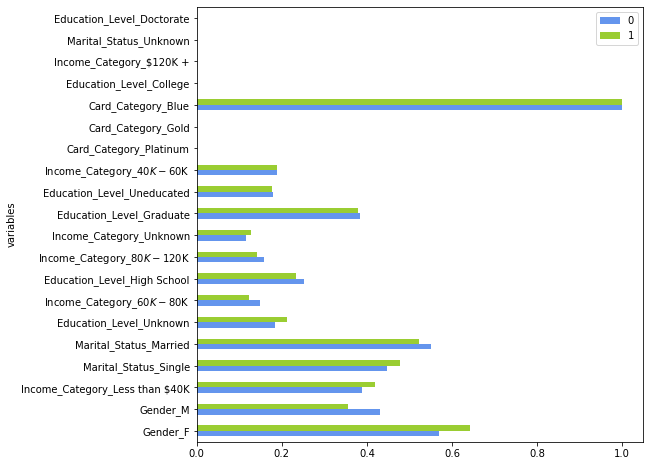

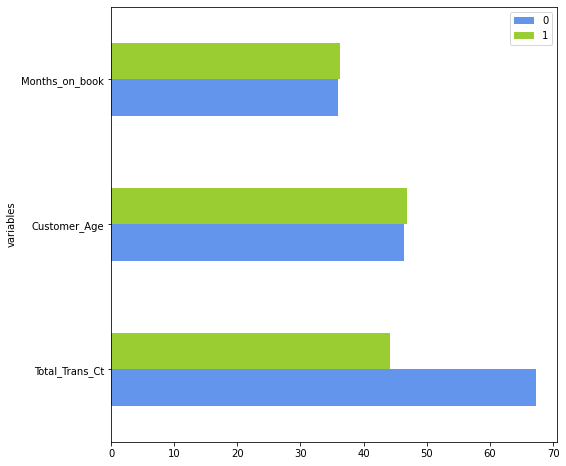

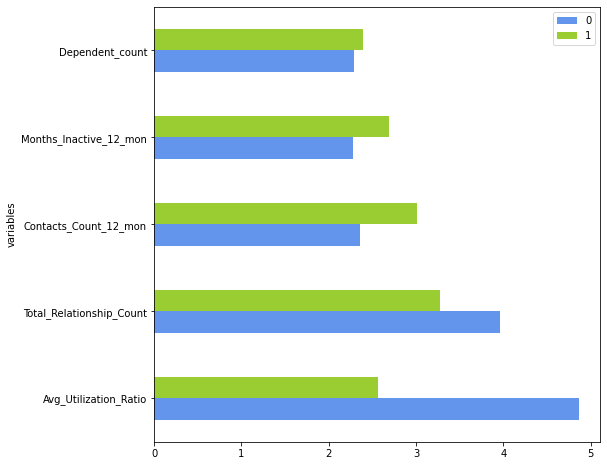

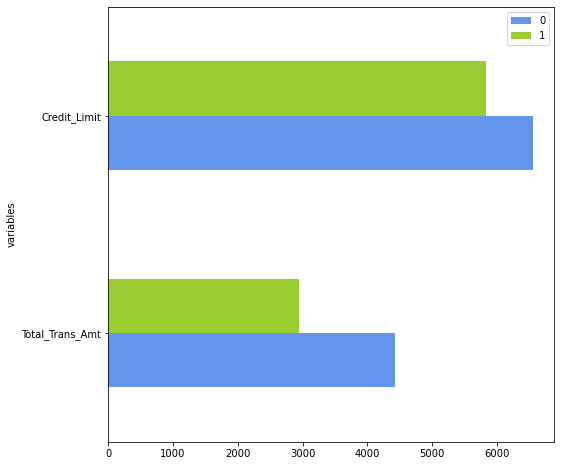

In [19]:
avg_df_1 = data.filter(['Attrition_Flag', 'Education_Level_College',
       'Education_Level_Doctorate', 'Education_Level_Graduate',
       'Education_Level_High School', 'Education_Level_Post-Graduate',
       'Education_Level_Uneducated', 'Education_Level_Unknown', 'Gender_F',
       'Gender_M', 'Marital_Status_Divorced', 'Marital_Status_Married',
       'Marital_Status_Single', 'Marital_Status_Unknown',
       'Income_Category_$120K +', 'Income_Category_$40K - $60K',
       'Income_Category_$60K - $80K', 'Income_Category_$80K - $120K',
       'Income_Category_Less than $40K', 'Income_Category_Unknown',
       'Card_Category_Blue', 'Card_Category_Gold', 'Card_Category_Platinum',
       'Card_Category_Silver'], axis=1)

avg_df_2 = data.filter(['Attrition_Flag', 'Customer_Age', 'Months_on_book', 'Total_Trans_Ct'], axis=1)
avg_df_3 = data.filter(['Attrition_Flag', 'Dependent_count', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
                            'Contacts_Count_12_mon', 'Avg_Utilization_Ratio'], axis=1)
avg_df_4 = data.filter(['Attrition_Flag', 'Credit_Limit', 'Total_Trans_Amt'], axis=1)

avg_df_1 = avg_df_1.groupby('Attrition_Flag').mean()
avg_df_1.reset_index(drop=True, inplace=True)
columns = list(avg_df_1.columns)
avg_df_1 = avg_df_1.T
avg_df_1["variables"] = columns
avg_df_1["difference"] = abs(avg_df_1[0] - avg_df_1[1])
sort_df_1 = avg_df_1.sort_values(by=['difference'], ascending=False)
difference_dataset_1 = sort_df_1.head(20)
difference_dataset_1.plot(x="variables", y=[0, 1], kind="barh", color = ["cornflowerblue", "yellowgreen"], figsize = (8,8))

avg_df_2 = avg_df_2.groupby('Attrition_Flag').mean()
avg_df_2.reset_index(drop=True, inplace=True)
columns = list(avg_df_2.columns)
avg_df_2 = avg_df_2.T
avg_df_2["variables"] = columns
avg_df_2["difference"] = abs(avg_df_2[0] - avg_df_2[1])
sort_df_2 = avg_df_2.sort_values(by=['difference'], ascending=False)
difference_dataset_2 = sort_df_2.head(20)
difference_dataset_2.plot(x="variables", y=[0, 1], kind="barh", color = ["cornflowerblue", "yellowgreen"], figsize = (8,8))

avg_df_3 = avg_df_3.groupby('Attrition_Flag').mean()
avg_df_3.reset_index(drop=True, inplace=True)
columns = list(avg_df_3.columns)
avg_df_3 = avg_df_3.T
avg_df_3["variables"] = columns
avg_df_3["difference"] = abs(avg_df_3[0] - avg_df_3[1])
sort_df_3 = avg_df_3.sort_values(by=['difference'], ascending=False)
difference_dataset_3 = sort_df_3.head(20)
difference_dataset_3.plot(x="variables", y=[0, 1], kind="barh", color = ["cornflowerblue", "yellowgreen"], figsize = (8,8))

avg_df_4 = avg_df_4.groupby('Attrition_Flag').mean()
avg_df_4.reset_index(drop=True, inplace=True)
columns = list(avg_df_4.columns)
avg_df_4 = avg_df_4.T
avg_df_4["variables"] = columns
avg_df_4["difference"] = abs(avg_df_4[0] - avg_df_4[1])
sort_df_4 = avg_df_4.sort_values(by=['difference'], ascending=False)
difference_dataset_4 = sort_df_4.head(20)
difference_dataset_4.plot(x="variables", y=[0, 1], kind="barh", color = ["cornflowerblue", "yellowgreen"], figsize = (8,8))


## Analysis of the correlations

<ipython-input-20-9ca086cc5dae>:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_tri = abs_corr.where(np.triu(np.ones(abs_corr.shape),k=1).astype(np.bool))


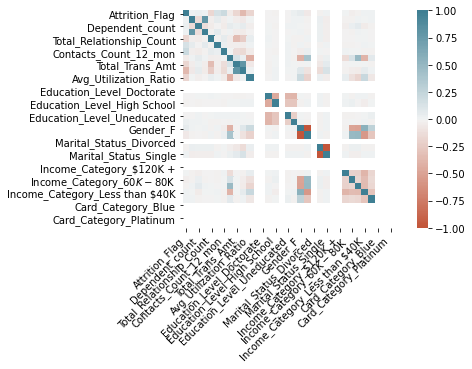

In [20]:
corr = data.corr()
ax = sns.heatmap(corr, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20, 220, n=200), square=True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

abs_corr = data.corr().abs()
upper_tri = abs_corr.where(np.triu(np.ones(abs_corr.shape),k=1).astype(np.bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.8)]
data = data.drop(to_drop, axis=1)

## Undersampling

In [21]:
import random
class_2,class_1 = data.Attrition_Flag.value_counts()
c2 = data[data['Attrition_Flag'] == 0]
c1 = data[data['Attrition_Flag'] == 1]
random.seed(42)
df_2 = c2.sample(class_1)
under_data = pd.concat([df_2,c1],axis=0)
under_data.Attrition_Flag.value_counts()

under_data['Attrition_Flag'].value_counts()

0    937
1    937
Name: Attrition_Flag, dtype: int64

## Train/test split

In [22]:
from numpy.random import default_rng
rng = default_rng(2022) # Set seed
train = rng.choice(int(under_data.shape[0]), size=int(round(under_data.shape[0]*0.8)), replace=False)
test = [i for i in range(under_data.shape[0]) if i not in train]
train_y, train_X = under_data.iloc[train, 0].values, under_data.iloc[train, 1:].values
test_y, test_X = under_data.iloc[test, 0].values, under_data.iloc[test, 1:].values
print(train_y.shape, train_X.shape, test_y.shape, test_X.shape)

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
train_X = sc.fit_transform(train_X)
test_X = sc.transform(test_X)

(1499,) (1499, 31) (375,) (375, 31)


## KNN

Test Accuracy:  0.712 with 1 neighbros 
 ------------------
Test Accuracy:  0.7253333333333334 with 3 neighbros 
 ------------------
Test Accuracy:  0.736 with 5 neighbros 
 ------------------
Test Accuracy:  0.784 with 7 neighbros 
 ------------------
Test Accuracy:  0.7573333333333333 with 9 neighbros 
 ------------------
Test Accuracy:  0.744 with 11 neighbros 
 ------------------
Test Accuracy:  0.7413333333333333 with 13 neighbros 
 ------------------
Test Accuracy:  0.7386666666666667 with 15 neighbros 
 ------------------
Test Accuracy:  0.7493333333333333 with 17 neighbros 
 ------------------
Test Accuracy:  0.7573333333333333 with 19 neighbros 
 ------------------
Test Accuracy:  0.7893333333333333 with 21 neighbros 
 ------------------
Test Accuracy:  0.7733333333333333 with 23 neighbros 
 ------------------
Test Accuracy:  0.7813333333333333 with 25 neighbros 
 ------------------
Test Accuracy:  0.7733333333333333 with 27 neighbros 
 ------------------
Test Accuracy:  0.765

Text(0, 0.5, 'Accuracy')

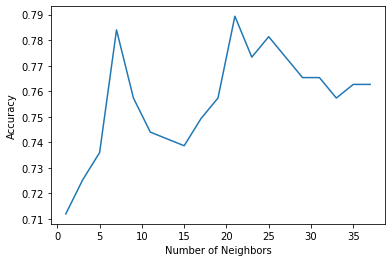

In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

l = range(int(round(np.sqrt(len(train_y)))))
n = [i for i in l if i%2 != 0]
n_accuracy = []
for neighbors in n:
    clf = KNeighborsClassifier(n_neighbors = neighbors)
    clf.fit(train_X, train_y)
    predicted_churn = clf.predict(test_X)
    n_accuracy.append(np.sum(predicted_churn == test_y) / len(test_y))
    print("Test Accuracy: " , np.sum(predicted_churn == test_y) / len(test_y), 'with',neighbors, 'neighbros',
          '\n ------------------')
sns.lineplot(x = n, y = n_accuracy)
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')    

In [25]:
total = dict(zip(n,n_accuracy))
arg_max = [i for i in range(len(n_accuracy)) if n_accuracy[i] == np.max(n_accuracy)]
print('Number of neighbors that maximizes test accuracy:', n[arg_max[0]])

Number of neighbors that maximizes test accuracy: 21


In [28]:
knn_model = KNeighborsClassifier(n_neighbors = n[arg_max[0]])
knn_model.fit(train_X, train_y)
predicted_churn = clf.predict(test_X)

from sklearn.metrics import accuracy_score, precision_score, recall_score
accuracy_train = knn_model.score(train_X, train_y)
print("KNN - Accuracy on the training set: " + str(accuracy_train))
print("KNN - Accuracy on the test set: " + str(accuracy_score(test_y, predicted_churn)))
print("KNN - Precision: " + str(precision_score(test_y, predicted_churn)))
print("KNN - Recall: " + str(recall_score(test_y, predicted_churn)))

KNN - Accuracy on the training set: 0.781854569713142
KNN - Accuracy on the test set: 0.7626666666666667
KNN - Precision: 0.7233009708737864
KNN - Recall: 0.8232044198895028


Text(91.68, 0.5, 'predicted label')

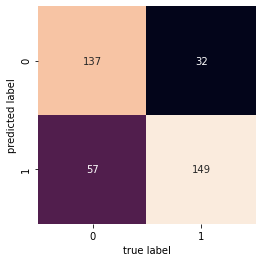

In [29]:
mat = confusion_matrix(test_y, predicted_churn)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

In [30]:
from sklearn.calibration import CalibratedClassifierCV
clf_knn = CalibratedClassifierCV(knn_model, cv=3, method='sigmoid')
clf_knn.fit(train_X, train_y)
y_proba_knn = clf_knn.predict_proba(test_X)
y_proba_knn = pd.DataFrame(y_proba_knn)
y_proba_knn.head()

#y_proba_knn['KNN PREDICTION'] = np.where(y_proba_knn[0] >= 0.5, 0, 1)

,0,1
0,0.721022,0.278978
1,0.698152,0.301848
2,0.713923,0.286077
3,0.872750,0.127250
4,0.671160,0.328840


## SVC

### Tuning

In [31]:
modelsvc = SVC()
param = {'kernel' : ('linear', 'poly', 'rbf', 'sigmoid'),'C' : [1,5,10],'degree' : [3,8],'coef0' : [0.01,10,0.5],'gamma' : ('auto','scale')}
CV_svc= GridSearchCV(estimator=modelsvc, param_grid=param, cv=5)
CV_svc.fit(train_X, train_y)
print(CV_svc.best_params_)

{'C': 1, 'coef0': 0.5, 'degree': 3, 'gamma': 'auto', 'kernel': 'poly'}


### Model

In [40]:
svc_model = SVC(C=1, coef0=0.5, degree=3, gamma='scale', kernel='poly')
svc_model.fit(train_X, train_y)
y_pred_svc = svc_model.predict(test_X)

accuracy_train = svc_model.score(train_X, train_y)
print("SVC - Accuracy on the training set: " + str(accuracy_train))
print("SVC - Accuracy on the test set: " + str(accuracy_score(test_y, y_pred_svc)))
print("SVC - Precision: " + str(precision_score(test_y, y_pred_svc)))
print("SVC - Recall: " + str(recall_score(test_y, y_pred_svc)))

SVC - Accuracy on the training set: 0.9266177451634423
SVC - Accuracy on the test set: 0.8586666666666667
SVC - Precision: 0.8333333333333334
SVC - Recall: 0.8839779005524862


Text(91.68, 0.5, 'predicted label')

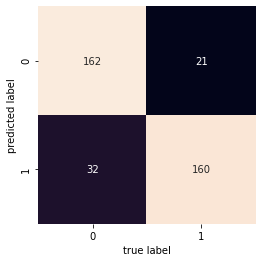

In [35]:
mat = confusion_matrix(test_y, y_pred_svc)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

In [36]:
from sklearn.calibration import CalibratedClassifierCV
clf_svc = CalibratedClassifierCV(svc_model, cv=3) 
clf_svc.fit(train_X, train_y)
y_proba_svc = clf_svc.predict_proba(test_X)
y_proba_svc = pd.DataFrame(y_proba_svc)
y_proba_svc.head()
#y_proba_svm['SVM PREDICTION'] = np.where(y_proba_svm[0] >= 0.5, 0, 1)

,0,1
0,0.970306,0.029694
1,0.864175,0.135825
2,0.661904,0.338096
3,0.834464,0.165536
4,0.622492,0.377508


## Random Forest

In [37]:
from sklearn.ensemble import RandomForestClassifier

### Tuning

In [42]:
rf_final = RandomForestClassifier(random_state=0)
param_grid = {
    'n_estimators': [100, 250, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [4, 5, 6, 7, 8],
    'criterion': ['gini', 'entropy']
}
CV_rfc = GridSearchCV(estimator=rf_final, param_grid=param_grid, cv=5)
CV_rfc.fit(train_X, train_y)
print(CV_rfc.best_params_)

{'criterion': 'entropy', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 250}


### Model

In [48]:
rfc1=RandomForestClassifier(random_state=0, max_features='auto', n_estimators= 500, max_depth=8, criterion='entropy')
rfc1.fit(train_X, train_y)
y_pred_rf = rfc1.predict(test_X)

rfc1.feature_importances_
sorted_idx = rfc1.feature_importances_.argsort()
X = under_data.iloc[:, under_data.columns != "Attrition_Flag"].values
yaxis1 = pd.DataFrame(X, columns= ['Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Avg_Utilization_Ratio', 'Education_Level_College',
       'Education_Level_Doctorate', 'Education_Level_Graduate',
       'Education_Level_High School', 'Education_Level_Post-Graduate',
       'Education_Level_Uneducated', 'Education_Level_Unknown', 'Gender_F',
       'Gender_M', 'Marital_Status_Divorced', 'Marital_Status_Married',
       'Marital_Status_Single', 'Marital_Status_Unknown',
       'Income_Category_$120K +', 'Income_Category_$40K - $60K',
       'Income_Category_$60K - $80K', 'Income_Category_$80K - $120K',
       'Income_Category_Less than $40K', 'Income_Category_Unknown',
       'Card_Category_Blue', 'Card_Category_Gold', 'Card_Category_Platinum',
       'Card_Category_Silver'])

under_data.columns

ValueError: Shape of passed values is (1874, 31), indices imply (1874, 33)

In [ ]:
plt.figure(figsize=(15, 15))
sns.barplot(x=rfc1.feature_importances_[sorted_idx], y=yaxis1.columns[sorted_idx], orient="h",
            palette="gist_rainbow")
plt.xlabel("Random Forest Feature Importance")
plt.title("Random Forest Features Importance", fontweight="bold", fontsize=12)
sns.set(font_scale=0.3)
plt.rcParams['figure.dpi'] = 300
plt.show()


### Accuracy

In [ ]:
accuracy_train = rfc1.score(train_X, train_y)
print("Random Forest - Accuracy on the training set: " + str(accuracy_train))
print("Random Forest - Accuracy on the test set: " + str(accuracy_score(test_y, y_pred_rf)))
print("Random Forest - Precision: " + str(precision_score(test_y, y_pred_rf)))
print("Random Forest - Recall: " + str(recall_score(test_y, y_pred_rf)))

In [ ]:
mat = confusion_matrix(test_y, y_pred_rf)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

In [ ]:
clf_rf = CalibratedClassifierCV(rfc1, cv=3) 
clf_rf.fit(train_X, train_y)
y_proba_rf = clf_rf.predict_proba(test_X)
y_proba_rf = pd.DataFrame(y_proba_rf)
y_proba_rf.head()
#y_proba_rf['RF PREDICTION'] = np.where(y_proba_rf[0] >= 0.5, 0, 1)

## Logistic Regression

In [52]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(train_X, train_y.ravel())
y_pred_log = logreg.predict(test_X)
y_pred_log = pd.DataFrame(y_pred_log)

accuracy_train = logreg.score(train_X, train_y)
print("Accuracy on the training set: " + str(accuracy_train))
print("Logistic Regression - Accuracy on the test set: " + str(accuracy_score(test_y, y_pred_log)))
print("Logistic Regression - Precision: " + str(precision_score(test_y, y_pred_log)))
print("Logistic Regression - Recall: " + str(recall_score(test_y, y_pred_log)))

Accuracy on the training set: 0.8372248165443629
Logistic Regression - Accuracy on the test set: 0.832
Logistic Regression - Precision: 0.8072916666666666
Logistic Regression - Recall: 0.856353591160221


Text(91.68, 0.5, 'predicted label')

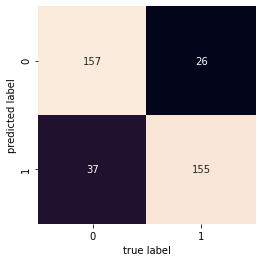

In [53]:
mat = confusion_matrix(test_y, y_pred_log)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

In [54]:
clf_lgr = CalibratedClassifierCV(logreg, cv=3) 
clf_lgr.fit(train_X, train_y)
y_proba_lgr = clf_lgr.predict_proba(test_X)
y_proba_lgr = pd.DataFrame(y_proba_lgr)
y_proba_lgr.head()
#y_proba_lgr['LGR PREDICTION'] = np.where(y_proba_lgr[0] >= 0.5, 0, 1)

,0,1
0,0.900406,0.099594
1,0.895991,0.104009
2,0.971317,0.028683
3,0.382686,0.617314
4,0.681241,0.318759


## Artificial Neural Network

Importing packages and building new classifer with grid search


In [1]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense

: 

: 

Building our Neural Network with empty optimizer, batch size, and epochs


In [ ]:
def build_classifier(optimizer):
    classifier = Sequential()
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 33))
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier
classifier = KerasClassifier(build_fn = build_classifier)


Parameters for batch size, epochs, and optimizer functions


In [ ]:
parameters = {'batch_size': [8, 16, 32, 64],
              'epochs': [50, 100, 200],
              'optimizer': ['adam', 'rmsprop']}

Setting up Grid Search

In [ ]:
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10)
grid_search = grid_search.fit(train_X, train_y)
best_parameters = grid_search.best_params_
best_parameters
best_accuracy = grid_search.best_score_
best_accuracy

# ??

In [57]:
import tensorflow
import keras
from keras.models import Sequential
from keras.layers import Dense
import random 

np.random.seed(42)

classifier = Sequential()

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 33))
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

In [ ]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


In [ ]:
classifier.fit(train_X, train_y, batch_size = 64, epochs = 200)
y_pred_ann = classifier.predict(test_X)
y_pred_ann = (y_pred_ann > 0.5)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_y, y_pred_ann)
print("ANN - Accuracy on the test set: ", accuracy_score(test_y, y_pred_ann))
print("ANN - Precision: ", precision_score(test_y, y_pred_ann))
print("ANN - Recall: ", recall_score(test_y, y_pred_ann))

In [ ]:
mat = confusion_matrix(test_y, y_pred_ann)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

# fine